In [1]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# Aplicación de Algoritmos (Data Cruda)

In [3]:
from sklearn.model_selection import train_test_split

#Partición de la data cruda
X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

print(X.shape)
print(X_trainval.shape)
print(X_train.shape)
print(X_val.shape)


(17898, 8)
(15213, 8)
(12170, 8)
(3043, 8)


In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix

def eval_model(model, X_val, y_val):
  #Realizando la prediccion del modelo
  y_pred = model.predict(X_val)
  #Calculando el error cuadratico medio
  MSE =mean_squared_error(y_val, y_pred)
  #Generando la matriz de confusion
  conf = confusion_matrix(y_val, y_pred)
  #Calculando las metricas
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred)
  recall = recall_score(y_val, y_pred)
  f1score = f1_score(y_val, y_pred)
  
  #Print de las metricas
  print('El MSE para el modelo '+type(model).__name__ +' es: ',MSE)
  print('El accuracy para el modelo '+type(model).__name__ +' es: ',accuracy)
  print('El precision para el modelo '+type(model).__name__ +' es: ',precision)
  print('El recall para el modelo '+type(model).__name__ +' es: ',recall)
  print('El F1-score para el modelo '+type(model).__name__ +' es: ',f1score)
  
  sns.heatmap(conf,annot=True, fmt="d", cmap="coolwarm");
  return None

##1° Algorithm Test: Random Forest

El MSE para el modelo RandomForestClassifier es:  0.02201774564574433
El accuracy para el modelo RandomForestClassifier es:  0.9779822543542557
El precision para el modelo RandomForestClassifier es:  0.9344262295081968
El recall para el modelo RandomForestClassifier es:  0.8172043010752689
El F1-score para el modelo RandomForestClassifier es:  0.8718929254302105


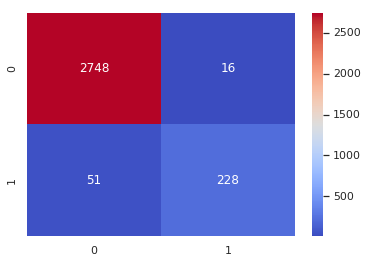

In [5]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model.fit(X_train, y_train)

eval_model(RF_model, X_val, y_val)

##2° Algorithm Test: SVM

El MSE para el modelo SVC es:  0.09069996713769307
El accuracy para el modelo SVC es:  0.909300032862307
El precision para el modelo SVC es:  1.0
El recall para el modelo SVC es:  0.010752688172043012
El F1-score para el modelo SVC es:  0.021276595744680854


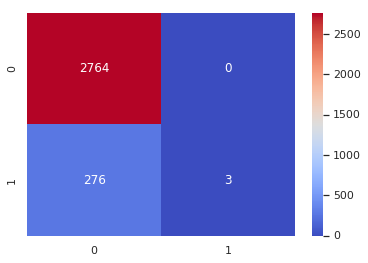

In [6]:
from sklearn.svm import SVC

SVM_model = SVC(gamma='auto',kernel='rbf')
SVM_model.fit(X_train, y_train) 

eval_model(SVM_model, X_val, y_val)

##3° Algorithm Test: KNN

El MSE para el modelo KNeighborsClassifier es:  0.026947091685836345
El accuracy para el modelo KNeighborsClassifier es:  0.9730529083141637
El precision para el modelo KNeighborsClassifier es:  0.8924302788844621
El recall para el modelo KNeighborsClassifier es:  0.8028673835125448
El F1-score para el modelo KNeighborsClassifier es:  0.8452830188679245


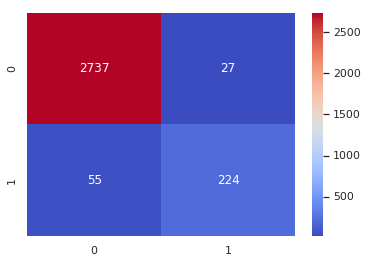

In [7]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train) 

eval_model(KNN_model, X_val, y_val)

##4° Algorithm Test: ANN - Multi-layer Perceptron

El MSE para el modelo MLPClassifier es:  0.02070325336838646
El accuracy para el modelo MLPClassifier es:  0.9792967466316136
El precision para el modelo MLPClassifier es:  0.95
El recall para el modelo MLPClassifier es:  0.8172043010752689
El F1-score para el modelo MLPClassifier es:  0.8786127167630059


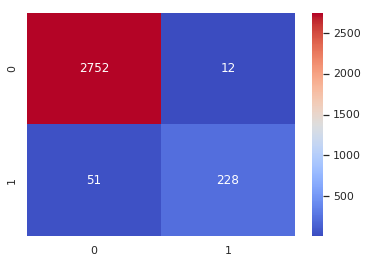

In [8]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()
NN_model.fit(X_train, y_train) 

eval_model(NN_model, X_val, y_val)

# Preprocesamiento de la Data

## Escalamiento de la data

In [0]:
#Escalamiento 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_pulsar)
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns = head)
data_pulsar_scaled.describe()

#Partición de la data escalada
X_sca = data_pulsar_scaled.drop(columns=["is_pulsar"])
y_sca = data_pulsar_scaled["is_pulsar"]

X_trainval_sca, X_test_sca, y_trainval_sca, y_test_sca = train_test_split(X_sca, y_sca, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train_sca, X_val_sca, y_train_sca, y_val_sca = train_test_split(X_trainval_sca, y_trainval_sca, test_size=0.2, random_state=0)


In [10]:

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

#Funcion para visualizar las puntuaciones de la
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X_sca,y_sca)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_sca,y_sca)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=5)
fit = bestfeatures.fit(X_sca,y_sca)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Specs         Score
2  kurt_IP  30033.327224
3  skew_IP  18143.230250
0  mean_IP  14830.932625
5   std_DM   5701.255353
4  mean_DM   3426.572386
6  kurt_DM   3226.140850
1   std_IP   2728.251495
7  skew_DM   1288.044817
     Specs        Score
3  skew_IP  1376.718000
4  mean_DM   902.671421
5   std_DM   837.368129
2  kurt_IP   542.360150
0  mean_IP   271.416086
6  kurt_DM   128.733550
7  skew_DM   106.965613
1   std_IP    68.789748
     Specs     Score
2  kurt_IP  0.226438
3  skew_IP  0.194512
0  mean_IP  0.191908
5   std_DM  0.119248
4  mean_DM  0.115351
7  skew_DM  0.115064
6  kurt_DM  0.113393
1   std_IP  0.088278


[0.1731501  0.05470287 0.30987732 0.18611439 0.08049926 0.09709162
 0.05685693 0.04170752]


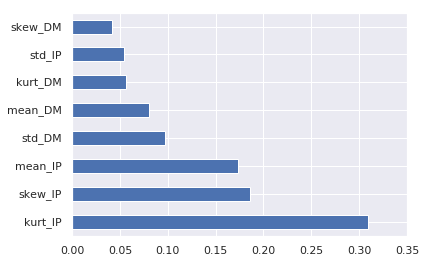

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Aplicación de SMOTE-ENN

In [12]:
#Antes de aplicar SMOTE
y_train_sca.value_counts()
print(type(y_train), type(X_train))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


In [13]:
#https://imbalanced-learn.readthedocs.io/en/stable/combine.html
from collections import Counter
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
X_train_smoteenn = pd.DataFrame(X_resampled)
y_train_smoteenn = pd.Series(y_resampled)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Aplicación de Modelos a data con SMOTE

##1° Algorithm Test: Random Forest

El MSE para el modelo RandomForestClassifier es:  0.03187643772592836
El accuracy para el modelo RandomForestClassifier es:  0.9681235622740716
El precision para el modelo RandomForestClassifier es:  0.7935483870967742
El recall para el modelo RandomForestClassifier es:  0.8817204301075269
El F1-score para el modelo RandomForestClassifier es:  0.835314091680815


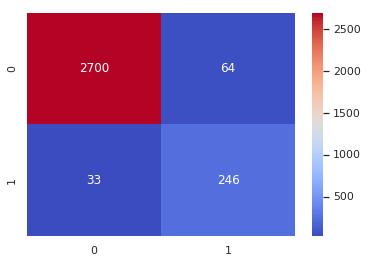

In [14]:
from sklearn.ensemble import RandomForestClassifier

RF_model2 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model2.fit(X_train_smoteenn, y_train_smoteenn)

eval_model(RF_model2, X_val, y_val)

##2° Algorithm Test: SVM

El MSE para el modelo SVC es:  0.09431482090042721
El accuracy para el modelo SVC es:  0.9056851790995728
El precision para el modelo SVC es:  0.4701492537313433
El recall para el modelo SVC es:  0.22580645161290322
El F1-score para el modelo SVC es:  0.3050847457627119


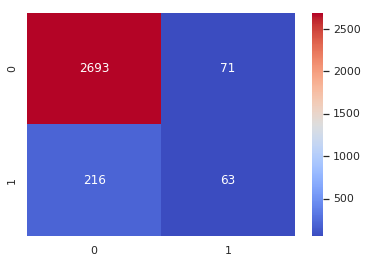

In [15]:
from sklearn.svm import SVC

SVM_model2 = SVC(gamma='auto',kernel='rbf')
SVM_model2.fit(X_train_smoteenn, y_train_smoteenn) 

eval_model(SVM_model2, X_val, y_val)

##3° Algorithm Test: KNN

El MSE para el modelo KNeighborsClassifier es:  0.08544199802826158
El accuracy para el modelo KNeighborsClassifier es:  0.9145580019717384
El precision para el modelo KNeighborsClassifier es:  0.5195071868583162
El recall para el modelo KNeighborsClassifier es:  0.9068100358422939
El F1-score para el modelo KNeighborsClassifier es:  0.660574412532637


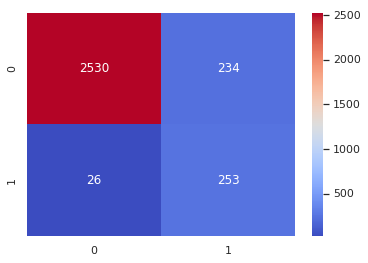

In [16]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model2 = KNeighborsClassifier(n_neighbors=5)
KNN_model2.fit(X_train_smoteenn, y_train_smoteenn) 

eval_model(KNN_model2, X_val, y_val)

##4° Algorithm Test: ANN - Multi-layer Perceptron

El MSE para el modelo MLPClassifier es:  0.05915215248110418
El accuracy para el modelo MLPClassifier es:  0.9408478475188958
El precision para el modelo MLPClassifier es:  0.6137931034482759
El recall para el modelo MLPClassifier es:  0.956989247311828
El F1-score para el modelo MLPClassifier es:  0.7478991596638656


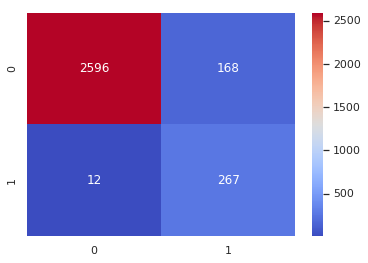

In [17]:
from sklearn.neural_network import MLPClassifier

NN_model2 = MLPClassifier()
NN_model2.fit(X_train_smoteenn, y_train_smoteenn) 

eval_model(NN_model2, X_val, y_val)

#Creacion del Fuzzy-KNN
El algoritmo a describir fui utilizado en el articulo  ["Pulsar Selection Using Fuzzy knn Classifier"](hhttps://www.researchgate.net/publication/321987873_Pulsar_Selection_Using_Fuzzy_knn_Classifier) del autor Taha Mohamed en el 2017, para la implementación se usoel código desarrollado en [link](https://github.com/sahilsehwag/FuzzyKNN/blob/master/fuzzy_knn.ipynb) 

In [0]:
import operator
from sklearn.base import BaseEstimator, ClassifierMixin

class FuzzyKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3, plot=False):
        self.k = k
        self.plot = plot
        
        
    def fit(self, X, y=None):
        self._check_params(X,y)
        self.X = X
        self.y = y
        
        self.xdim = len(self.X[0])
        print("xdim: ",self.xdim)
        self.n = len(y)
        print("n: ",self.n)
        
        classes = list(set(y))
        classes.sort()
        self.classes = classes
        print("classes: ",self.classes)
        
        self.df = pd.DataFrame(self.X)
        self.df['y'] = self.y
        
        self.memberships = self._compute_memberships()
        
        self.df['membership'] = self.memberships
        
        self.fitted_ = True
        return self
    
    
    def predict(self, X):
        if self.fitted_ == None:
            raise Exception('predict() called before fit()')
        else:
            m = 0.3
            y_pred = []
            
            for x in X:
                neighbors = self._find_k_nearest_neighbors(pd.DataFrame.copy(self.df), x)
                
                votes = {}
                for c in self.classes:
                    den = 0
                    for n in range(self.k):
                        dist = np.linalg.norm(x - neighbors.iloc[n,0:self.xdim])
                        den += 1 / (dist ** (2 / (m-1)))
                    
                    neighbors_votes = []
                    for n in range(self.k):
                        dist = np.linalg.norm(x - neighbors.iloc[n,0:self.xdim])
                        num = (neighbors.iloc[n].membership[c]) / (dist ** (2 / (m-1)))
                        
                        vote = num/den
                        neighbors_votes.append(vote)
                    votes[c] = np.sum(neighbors_votes)
                    
                pred = max(votes.items(), key=operator.itemgetter(1))[0]
                y_pred.append(pred)
                #y_pred.append((pred, votes))
                
            return y_pred
        
        
    def score(self, X, y):
        if self.fitted_ == None:
            raise Exception('score() called before fit()')
        else:
            predictions = self.predict(X)
            y_pred = [t[0] for t in predictions]
            confidences = [t[1] for t in predictions]
            
            return accuracy_score(y_pred=y_pred, y_true=y)
    
        
    def _find_k_nearest_neighbors(self, df, x):
        X = df.iloc[:,0:self.xdim].values
        
        df['distances'] = [np.linalg.norm(X[i] - x) for i in range(self.n)]
        
        df.sort_values(by='distances', ascending=True, inplace=True)
        neighbors = df.iloc[0:self.k]
        
        return neighbors

                
    def _get_counts(self, neighbors):
        groups = neighbors.groupby('y')
        counts = {group[1]['y'].iloc[0]:group[1].count()[0] for group in groups}
        
        return counts
        
        
    def _compute_memberships(self):
        memberships = []
        for i in range(self.n):
            if i%1000 == 0:
              print(i)
            x = self.X[i]
            y = self.y[i]
            
            neighbors = self._find_k_nearest_neighbors(pd.DataFrame.copy(self.df), x)
            counts = self._get_counts(neighbors)
        
            membership = dict()
            for c in self.classes:
                try:
                    uci = 0.49 * (counts[c] / self.k)
                    if c == y:
                        uci += 0.51
                    membership[c] = uci
                except:
                    membership[c] = 0
                    
            memberships.append(membership)
        return memberships
        
        
    def _check_params(self, X, y):
        if type(self.k) != int:
            raise Exception('"k" should have type int')
        elif self.k >= len(y):
            raise Exception('"k" should be less than no of feature sets')
        elif self.k % 2 == 0:
            raise Exception('"k" should be odd')
            
        if type(self.plot) != bool:
            raise Exception('"plot" should have type bool')

In [42]:
FKNN = FuzzyKNN()
FKNN.fit(X_train.values, y_train.tolist())

xdim:  8
n:  12170
classes:  [0, 1]
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


FuzzyKNN(k=3, plot=False)

In [0]:
FKNN_y_predict = FKNN.predict(X_val.values)

El MSE para el modelo Fuzzy-KNN es:  0.028590207032533684
El accuracy para el modelo Fuzzy-KNN es:  0.9714097929674663
El precision para el modelo Fuzzy-KNN es:  0.8870967741935484
El recall para el modelo  Fuzzy-KNN es:   0.7885304659498208
El F1-score para el modelo  Fuzzy-KNN es:  0.8349146110056925


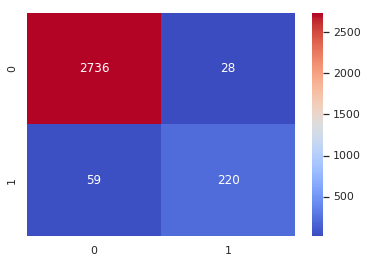

In [44]:
#FKNN_y_predict
#Calculando el error cuadratico medio
MSE =mean_squared_error(y_val, FKNN_y_predict)
#Generando la matriz de confusion
conf = confusion_matrix(y_val, FKNN_y_predict)
#Calculando las metricas
accuracy = accuracy_score(y_val, FKNN_y_predict)
precision = precision_score(y_val, FKNN_y_predict)
recall = recall_score(y_val, FKNN_y_predict)
f1score = f1_score(y_val, FKNN_y_predict)
  
#Print de las metricas
print('El MSE para el modelo Fuzzy-KNN es: ',MSE)
print('El accuracy para el modelo Fuzzy-KNN es: ',accuracy)
print('El precision para el modelo Fuzzy-KNN es: ',precision)
print('El recall para el modelo  Fuzzy-KNN es:  ',recall)
print('El F1-score para el modelo  Fuzzy-KNN es: ',f1score)
  
sns.heatmap(conf,annot=True, fmt="d", cmap="coolwarm");

In [45]:
TN = conf[0][0]
FP = conf[0][1]
TP = conf[1][1]
FN = conf[1][0]

recall = (TP)/(TP+FN)
specificity = (TN)/(FP+TN)
gmean = np.sqrt(recall*specifivity)
FPR = FP/(FP+TN)
precision = TP/(TP+FP)
fscore = 2*(precision*recall)/(precision+recall)

print('TP: ',TP,'TN: ',TN)
print('FP: ',FP,'FN: ',FN)
print('precision: ', precision )
print('recall: ', recall )
print('specificity: ', specificity)
print('gmean: ', gmean)
print('FPR: ', FPR)
print('FScore: ', fscore)

TP:  220 TN:  2736
FP:  28 FN:  59
precision:  0.8870967741935484
recall:  0.7885304659498208
specificity:  0.9898697539797395
gmean:  0.8839673728673357
FPR:  0.010130246020260492
FScore:  0.8349146110056925
